ema 7: 2.337033939680126 ema 14: 2.3395196321450733 ema 30: 2.345660471697294


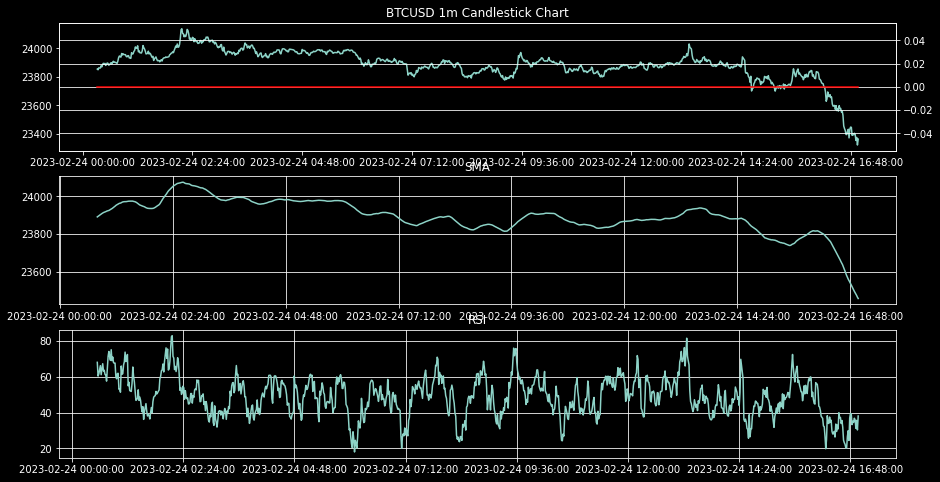

In [9]:
import ccxt
import numpy as np
import talib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt
import config
import pandas as pd
from phemex import *

# Define the exchange and symbol
exchange_id = 'phemex'
symbol = 'BTCUSD'
timeframe = '1h'
limit = 1000
# Create the exchange object
exchange = getattr(ccxt, exchange_id)()
posInfo = getPositionInfo()[0]
# print('posInfo',posInfo)
entryPrice = posInfo['entryPrice']

# print(posInfo['amount'])
# amount = posInfo['amount']
symbol = posInfo['symbol']
side = posInfo['side']
# Define the timeframe and number of candles
timeframe = '1m'
num_candles = 100

# Get the OHLCV data from the exchange
ohlcv_raw = exchange.fetch_ohlcv(symbol=symbol, timeframe=timeframe, limit=limit)
timestamps = [x[0] for x in ohlcv_raw]
# print(timestamps)
dates=[dt.datetime.fromtimestamp(x[0]/1000) for x in ohlcv_raw]
datenums=md.date2num(dates)
# Extract the close prices from the OHLCV data
# print(ohlcv)
close_prices = [x[4] for x in ohlcv_raw]
# print(close_prices)
# Convert close_prices to a numpy array
close_prices = np.array(close_prices)
# print(close_prices)
# Set the EMA periods
ema_7 = 7
ema_14 = 14
ema_30 = 30
# Calculate the EMAs using talib
ema_7_latest = (talib.EMA(close_prices, timeperiod=ema_7)[-1] * 0.0001)
ema_14_latest = (talib.EMA(close_prices, timeperiod=ema_14)[-1] *
                    0.0001)
ema_30_latest = (talib.EMA(close_prices, timeperiod=ema_30)[-1] *
                    0.0001)
print('ema 7: {} ema 14: {} ema 30: {}'.format(ema_7_latest,ema_14_latest,ema_30_latest))
# check if there are any open long positions
has_long_positions = False

if side == 'Buy':
    has_long_positions = True
# Convert the OHLCV data to a numpy array
ohlcv = np.array(ohlcv_raw)

# Assume `ohlcv` is a numpy array with shape (n_candles, 5) containing the OHLCV data
opens = ohlcv[:, 0]
highs = ohlcv[:, 1]
lows = ohlcv[:, 2]
closes = ohlcv[:, 4]

# Plot the candlestick chart with the harmonic pattern overlaid
# fig, ax = plt.subplots()
# ax.plot(closes)
# ax2 = ax.twinx()
# ax2.plot(pattern, color='red')

# Calculate the technical indicators
sma = talib.SMA(closes)
rsi = talib.RSI(closes)
macd, macdsignal, macdhist = talib.MACD(closes)

# Create the subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 8))
# Calculate the harmonic pattern using TA-Lib
pattern = talib.CDLHARAMI(opens, highs, lows, closes)
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
# Plot the candlestick chart
axs[0].plot(datenums,closes)
axs[0] = axs[0].twinx()
axs[0].set_title(symbol + ' ' + timeframe + ' Candlestick Chart')
axs[0].grid(True)
axs[0].plot(datenums,pattern, color='red')
axs[0].xaxis.set_major_formatter(xfmt)

# Plot the moving average
axs[1].set_title('SMA')
axs[1].grid(True)
axs[1].plot(datenums, sma)
axs[1].xaxis.set_major_formatter(xfmt)

# Plot the RSI
axs[2].set_title('RSI')
axs[2].grid(True)
axs[2].plot(datenums, rsi)
axs[2].xaxis.set_major_formatter(xfmt)

# Show the chart
plt.show()
# Convert the plot to an image and save it
fig.canvas.draw()
image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
plt.close()
# Preprocess the image and prepare it for input to the CNN RNN model
# image = preprocess_image(image)
# image_array = preprocess_image('my_image.jpg')
# model = create_model(input_shape=image_array.shape, num_classes=10)
# rnn_model = create_rnn_model(input_shape=(10, image_array.shape[0]), num_classes=10)